### Load the data

In [29]:
import os
from glob import glob
import numpy as np

%matplotlib inline

# Use Small Dataset
CARS_GLOB = './data/vehicles_smallset/*/*.jpeg'
NO_CARS_GLOB = './data/non-vehicles_smallset/*/*.jpeg'

# Use Full Dataset
# CARS_GLOB = './data/vehicles/*/*.jpeg'
# NO_CARS_GLOB = './data/non-vehicles/*/*.jpeg'

car_paths = glob(CARS_GLOB)
no_car_paths = glob(NO_CARS_GLOB)

### Let's display a few

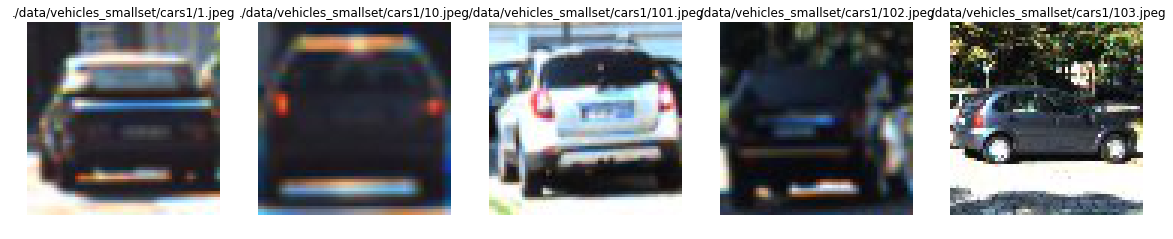

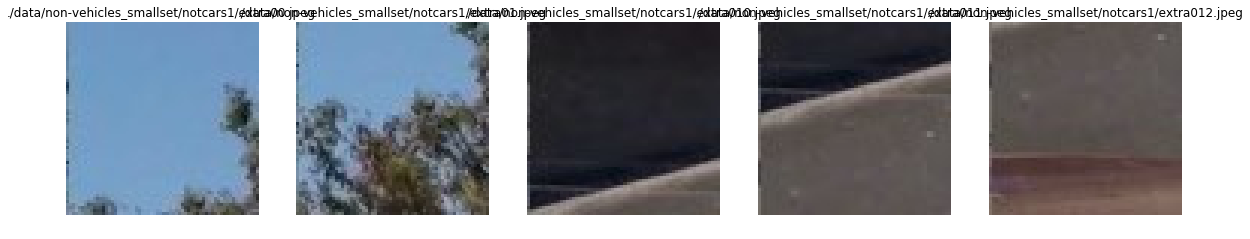

In [30]:
from util import show_images_from_paths

N_SAMPLE = 5

show_images_from_paths(car_paths[:N_SAMPLE])
show_images_from_paths(no_car_paths[:N_SAMPLE])

### Let's convert an image to a feature vector

In [31]:
from util import paths_to_images_gen
from features import extract_features_many

N_SAMPLE = 200

car_imgs = paths_to_images_gen(car_paths[:N_SAMPLE])
car_features = extract_features_many(car_imgs)

no_car_imgs = paths_to_images_gen(no_car_paths[:N_SAMPLE])
no_car_features = extract_features_many(no_car_imgs)

#### How many of each type of image is there?

In [32]:
print(len(car_paths))
print(len(no_car_paths))
## For the small dataset we have 
## cars: 1196 images 
## no cars: 1125 images with no cars

1196
1125


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

rand_state=10

# Detect image paths and load images
car_imgs = paths_to_images_gen(car_paths)
car_features = extract_features_many(car_imgs)
no_car_imgs = paths_to_images_gen(no_car_paths)
no_car_features = extract_features_many(no_car_imgs)

X = np.vstack((car_features, no_car_features)).astype(np.float64)                        
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)
y = np.concatenate((np.ones(len(car_paths)), np.zeros(len(no_car_paths))))

X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

In [42]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

svc = SVC(kernel='rbf', C=5)
scores = cross_val_score(svc, X_train, y_train)
print(scores, scores.mean())

[ 0.99515347  0.98546042  0.98705502] 0.989222969853


### Search for better params

In [38]:
from sklearn.grid_search import GridSearchCV

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10, 20]}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [41]:
grid_search.best_params_

{'C': 5, 'kernel': 'rbf'}